The library used is RTA dataset.csv from kaggle

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('RTA dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [3]:
## Checking for unique categories in each categorical columns
categorical_column = df.select_dtypes(include='object').columns
for col in categorical_column:
    print(f"Unique values in column {col}: ")
    print(df[col].unique())

Unique values in column Time: 
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Unique values in column Day_of_week: 
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Unique values in column Age_band_of_driver: 
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Unique values in column Sex_of_driver: 
['Male' 'Female' 'Unknown']
Unique values in column Educational_level: 
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Unique values in column Vehicle_driver_relation: 
['Employee' 'Unknown' 'Owner' nan 'Other']
Unique values in column Driving_experience: 
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
Unique values in column Type_of_vehicle: 
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' '

In [4]:
## There are many missing values which are represented by 'Unknown', which needs to be replaced by 'NaN'
df = df.replace('Unknown',np.nan)
df = df.replace('na',np.nan)

In [5]:
## Checking for missing values
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver             1548
Sex_of_driver                   178
Educational_level               841
Vehicle_driver_relation         593
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        6811
Defect_of_vehicle              4427
Area_accident_occured           261
Lanes_or_Medians                442
Road_allignment                 142
Types_of_Junction              1078
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions              292
Type_of_collision               169
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                396
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

In [6]:
## Checking percentage of missing data
for col in df.columns:
    print(f'Percentage of missing value in {col} is {(df[col].isnull().sum()/len(df[col]))*100}')

Percentage of missing value in Time is 0.0
Percentage of missing value in Day_of_week is 0.0
Percentage of missing value in Age_band_of_driver is 12.569015914257875
Percentage of missing value in Sex_of_driver is 1.4452744397531665
Percentage of missing value in Educational_level is 6.8285157518674895
Percentage of missing value in Vehicle_driver_relation is 4.814874959402403
Percentage of missing value in Driving_experience is 6.731081519974018
Percentage of missing value in Type_of_vehicle is 7.713543358233192
Percentage of missing value in Owner_of_vehicle is 3.9136083143877882
Percentage of missing value in Service_year_of_vehicle is 55.30204611886976
Percentage of missing value in Defect_of_vehicle is 35.94511204936668
Percentage of missing value in Area_accident_occured is 2.119194543683014
Percentage of missing value in Lanes_or_Medians is 3.5888275414095485
Percentage of missing value in Road_allignment is 1.152971744072751
Percentage of missing value in Types_of_Junction is 8.

In [8]:
## Some columns should be deleted because they have more missing values
columns_to_be_deleted = ['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality','Age_band_of_casualty','Casualty_class']
df = df.drop(columns = columns_to_be_deleted , axis=1)
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Normal,Collision with roadside-parked vehicles,2,2,Going straight,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Normal,Vehicle with vehicle collision,2,2,Going straight,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Normal,Collision with roadside objects,2,2,Going straight,Male,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Normal,Vehicle with vehicle collision,2,2,Going straight,Female,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,...,Normal,Vehicle with vehicle collision,2,2,Going straight,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [9]:
# Converting 'Time' column to datetime format and extract hour
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df.dropna(subset=['Time'], inplace=True)
    df['Hour'] = df['Time'].dt.hour
## Replacing the other missing values of categorical columns by mode
categorical_cols = df.select_dtypes(include='object')
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
## Replacing the missing values of numerical cols by their median
numerical_cols = df.select_dtypes(include = 'int64')
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Sex_of_casualty                0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
Hour                           0
dtype: int64

In [10]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,1900-01-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2,2,Going straight,Male,3,Not a Pedestrian,Moving Backward,Slight Injury,17
1,1900-01-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2,2,Going straight,Male,3,Not a Pedestrian,Overtaking,Slight Injury,17
2,1900-01-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Collision with roadside objects,2,2,Going straight,Male,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2,2,Going straight,Female,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2,2,Going straight,Male,3,Not a Pedestrian,Overtaking,Slight Injury,1


C:\Users\USER\AppData\Local\Temp\ipykernel_10456\510965351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


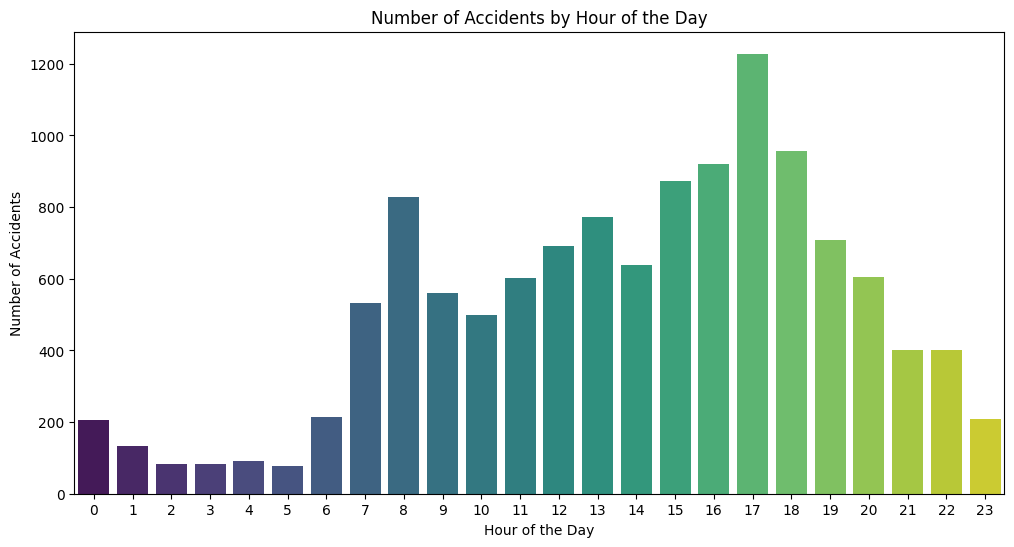

In [11]:
## Grouping Accidents by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

It seems that highest number of accidents occur around 5PM which indicates that drivers might get distracted more during that time which maybe due to heavy traffic.

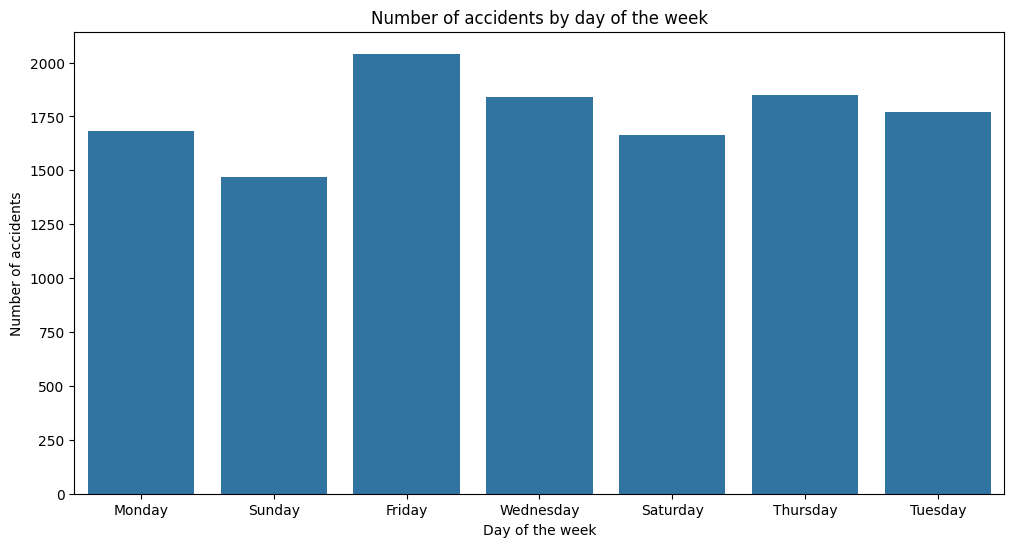

In [12]:
## Grouping accidents by day of the week
plt.figure(figsize=(12,6))
sns.countplot(x='Day_of_week',data=df)
plt.title('Number of accidents by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of accidents')
plt.show()

Highest number of accidents occur on Friday.

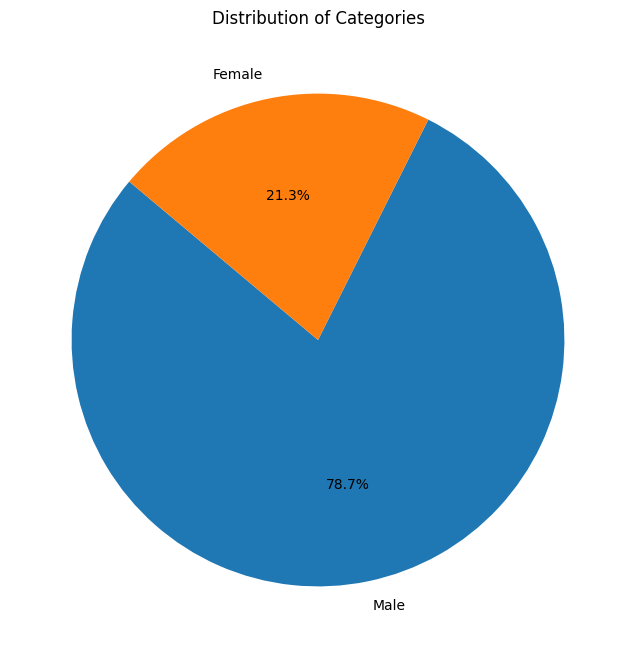

In [13]:
## Visualizing the sex of casualties
category_counts = df['Sex_of_casualty'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.show()


Hence around 79% of the casulties are males.

C:\Users\USER\AppData\Local\Temp\ipykernel_10456\2810152858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather_conditions',data=df,palette='viridis' )


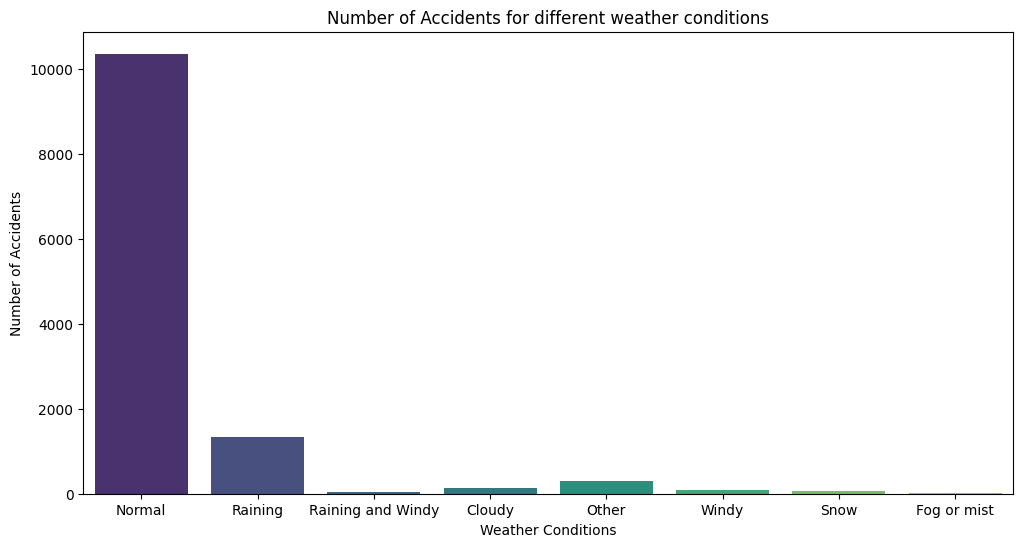

In [14]:
## Visualising the Weather_conditions 
plt.figure(figsize=(12,6))
sns.countplot(x='Weather_conditions',data=df,palette='viridis' )
plt.title('Number of Accidents for different weather conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()

Hence the highest number of accidents are occuring in normal weather conditions.

C:\Users\USER\AppData\Local\Temp\ipykernel_10456\3725883518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Road_surface_conditions',data=df,palette = 'viridis')


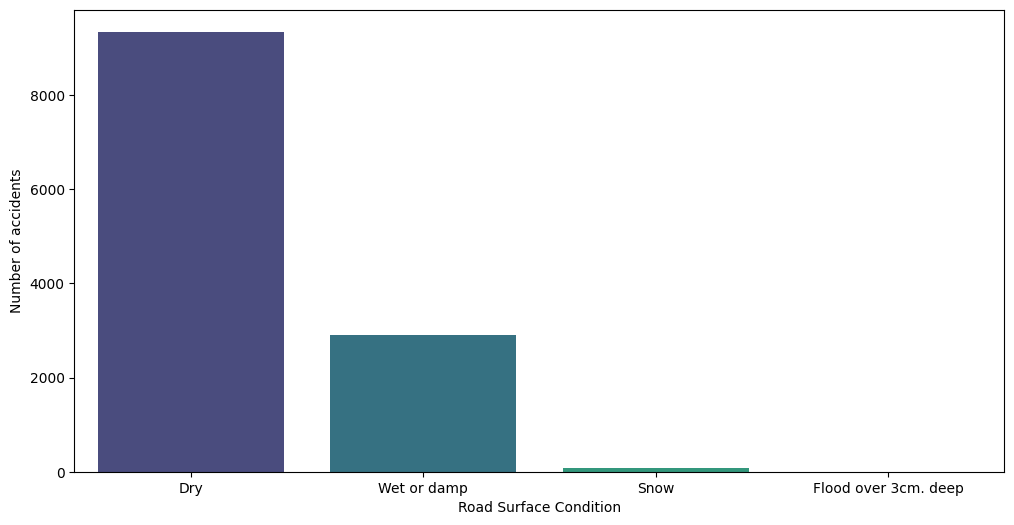

In [15]:
## Visualizing number of accidents by road surface condition
plt.figure(figsize=(12,6))
sns.countplot(x='Road_surface_conditions',data=df,palette = 'viridis')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of accidents')
plt.show()


Hence the highest number of accidents occured in dry road surface.